In [10]:
# the following line is used to allow plotting inside the .ipynb file
%matplotlib inline

We start by loading the data from the CSV file.

In [6]:
import pandas as pd

site1 = pd.read_csv("../../data/week2/windspeed.csv", parse_dates=['Newdate'])
site1.head()

,DateTime,WindSpeed,U,V,RH,P,T,WS,WD,Newdate,Year,Month,Day,Hour
0,01/01/2011 01:00,10.14,3.373566,-5.185395,0.005022,102321.7031,277.546997,6.186216,326.952,2011-01-01,2011,1,1,1
1,01/01/2011 02:00,10.12,1.926434,-5.926662,0.004975,102365.1875,277.406067,6.231892,341.993,2011-01-01,2011,1,1,2
2,01/01/2011 03:00,8.94,0.625309,-6.506193,0.004870,102432.4219,277.108398,6.536173,354.510,2011-01-01,2011,1,1,3
3,01/01/2011 04:00,9.53,-0.294136,-6.760742,0.004642,102493.9609,276.832886,6.767137,2.491,2011-01-01,2011,1,1,4
4,01/01/2011 05:00,11.68,-0.551288,-6.811029,0.004435,102540.0000,276.397736,6.833304,4.627,2011-01-01,2011,1,1,5


We will only keep data for the year 2013 and calculate daily averages.

In [8]:
site1 = site1[site1['Newdate'].between('2013','2014')]
mean_speed = site1.groupby(pd.Grouper(key='Newdate', freq='D')).mean()['WindSpeed']

We can now plot the data

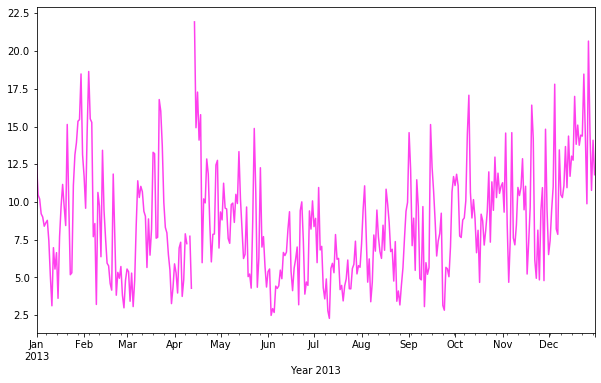

In [12]:
ax = mean_speed.plot(x='Newdate', y='WindSpeed', c='#FE40ED', figsize=(10,6))
ax.set_xlabel("Year 2013");

In [ ]:
Using the package imputeTS we can visualise where the missing values are.

In [ ]:
library(imputeTS)
plotNA.distribution(x=mean_speed$WindSpeed, colPoints=2, colBackgroundMV=3)

Another helpful plot is the distribution bar, which shows where observations are missing.

plotNA.distributionBar(x=mean_speed$WindSpeed)

If we want to fit a model to the data which cannot work with missing values (and unfortunately very few models can cope with missing values), we need to impute some values.

We can impute the overall mean. This is the simplest, but not a very sophisticated approach.

mean_speed_imp <- na.mean(mean_speed)

We could now work with this data set, but let’s first visualise the imputed values.

plotNA.imputations(mean_speed$WindSpeed,mean_speed_imp$WindSpeed)

We can also impute values, based on a time series model. This usually gives more realistic results, but is highly dependent on whether the time series model is suitable or not.

mean_speed_imp <- na.kalman(mean_speed)
plotNA.imputations(mean_speed$WindSpeed,mean_speed_imp$WindSpeed)

In this particular example, there is actually a much easier solution. The missing values for the daily time series is only due to there being missing values for a small number of hours for each day. So far we have made the daily mean a missing value (NA) as soon as the hourly measurements were missing for a single hour.

Instead, we could simply calculate the daily average from the other hours of the day, so that we would only get missing values if we had no measurements at all for that day.

mean_speed <- aggregate(WindSpeed ~ Newdate, data=site1, mean, na.action=na.omit)

This dataset now contains no missing values at all.

plot(WindSpeed ~ Newdate, data=mean_speed, xlab="Year 2013", type="l", co